# Aviation Risk Analysis

## Overview

This project aims to analyze the risk involved in aviation business by completing descriptive analyses on the [data](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses). The ultimate goal of this project is to provide 3 actionable recommendations to companies evaluating the risk involved in the aviation business as potential future directions and strategies.

## Business Problem

Businesses that are interested in expanding their businesses to the aviation operations and purchases must evaluate the risk involved prior to making an executive decision.  Knowledge on different risk factors in aviation business can help them provide more effective preventative measures or purchase less accident or incident prone makes and models of the aircraft.

## Data information
This dataset retrieved from the National Transportation Safety Board contains the accidents and incidents that occurred from 1948 to 2022. 


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
df = pd.read_csv('Aviation_Data.csv') 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

/var/folders/g7/g9fxssr51yd508bw8xr5xtcw0000gn/T/ipykernel_6512/2998118098.py:1: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Aviation_Data.csv')


The raw dataset contains 90348 entries and 30 columns. Although not all categories are visible, majority of columns appear to contain some null values. Also, majority of them have objects as their data type.

## Data Cleaning and Feature Engineering

### Dropping irrelevant columns

We have decided to drop several irrelevant columns to our risk analyses. These columns include:
- Accident Number
- Latitude
- Longitude
- Airport Code
- Airport Name
- Injury Severity (due to having more detailed information on other columns)
- Registration Number
- Engine Type
- FAR Description
- Schedule
- Air carrier
- Report Status
- Publication Date


In [5]:
columns_to_drop = ['Accident.Number', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Registration.Number', 'Engine.Type', 'Total.Uninjured', 'FAR.Description',
       'Schedule', 'Air.carrier', 'Report.Status',
       'Publication.Date']
df = df.drop(columns=columns_to_drop)


In [6]:
df.info() # Now we have 17 columns, instead of 30 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Event.Date              88889 non-null  object 
 3   Location                88837 non-null  object 
 4   Country                 88663 non-null  object 
 5   Aircraft.damage         85695 non-null  object 
 6   Aircraft.Category       32287 non-null  object 
 7   Make                    88826 non-null  object 
 8   Model                   88797 non-null  object 
 9   Amateur.Built           88787 non-null  object 
 10  Number.of.Engines       82805 non-null  float64
 11  Purpose.of.flight       82697 non-null  object 
 12  Total.Fatal.Injuries    77488 non-null  float64
 13  Total.Serious.Injuries  76379 non-null  float64
 14  Total.Minor.Injuries    76956 non-null

### Exploring Columns and Filtering

Now that the dataframe contains the columns that are relevant to our risk analysis, we look into the missing values and value counts on invidivual columns and determine our strategies for managng missing values and simplifying the data further by focusing on a subset of this data. 

#### Aircraft Categories
First, we explore the column **Aircraft Category** to simplify the dataframe by focusing on one type of aircraft, **airplane**, as it is more applicable for our risk analysis.


In [5]:
df['Aircraft.Category'].isna().sum() #58061
df['Aircraft.Category'].value_counts()

Aircraft.Category
Airplane             27617
Helicopter            3440
Glider                 508
Balloon                231
Gyrocraft              173
Weight-Shift           161
Powered Parachute       91
Ultralight              30
Unknown                 14
WSFT                     9
Powered-Lift             5
Blimp                    4
UNK                      2
Rocket                   1
ULTR                     1
Name: count, dtype: int64

**Aircraft Categories** column contains many null values, and the **Airplane** is the value with the most counts. Therefore, we decide to exclude all null values due to lack of specification and focus on a subset of data that specifies **Airplane** as the aircraft category. Our rationale for this decision is that the rest of categories such as **Balloon** or **Powered Parachute** are not as applicable to our risk analysis for business stakeholders. Also, inclusion of null values may increase the inaccuracy of the data, as the specific information are not included.

In [7]:
# Just focusing on 'Airplane' from Aircraft Category
df_airplane = df.loc[df['Aircraft.Category'] == 'Airplane']

#### Investigation Type

We explore the **Investigation Type** column and its value counts. We decide to only focus on the records specified with the **Accident** investigation type from further analyses.

In [25]:
# Filtering the "Investigation.Type" column to only contain 'Accident'
df_airplane = df_airplane.loc[df_airplane['Investigation.Type'] == 'Accident']
df_airplane['Investigation.Type'].value_counts()

Investigation.Type
Accident    25963
Name: count, dtype: int64

#### Country

Here, we examine the **Country** column to determine if we want to proceed with our analyses on international accident and incident occurrence or focus on domestic in the United States.

In [26]:
df_airplane['Country'].value_counts()

Country
United States     23659
Brazil              216
Canada              148
Mexico              146
United Kingdom      133
                  ...  
Singapore             1
Nicaragua             1
Madagascar            1
Niger                 1
South Korean          1
Name: count, Length: 153, dtype: int64

Based on the value counts of the **Country** column, we decide to only focus on accidents and incidents occurred in the United States territories and drop any other countries other than **United States**. As companies interested in this project will most likely be new to the aviation business, it may be more beneficial to start venturing out starting from domestic strategies rather than international.

In [27]:
df_USA_airplane = df_airplane.loc[df_airplane['Country'] == 'United States']

# Checking if the only value is United States
df_USA_airplane['Country'].value_counts()

Country
United States    23659
Name: count, dtype: int64

#### Aircraft Damage, Total Fatal Injuries, Total Serious Injuries, Total Minor Injuries, and Total Uninjured

For this project, these measures represent the main outcomes fromt individual accidents and incidents. These columns are crucial for completing the risk analyses. Therefore, while we explore these columns and understand the value counts, we also aim to handle the missing values with the most appropriate strategy.

In [28]:
# How many missing values are there?
df_USA_airplane[['Aircraft.damage', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries']].isna().sum()
# 482, 2961, 2941, 2596 null values

df_USA_airplane['Aircraft.damage'].value_counts()

Aircraft.damage
Substantial    20517
Destroyed       2673
Minor            140
Unknown           43
Name: count, dtype: int64

Since there is an **Unknown** category, we decide to impute the missing values with the **Unknown** category in the **Aircraft Damage** column instead of simply deleting the rows. 

In [29]:
df_USA_airplane['Aircraft.damage'] = df_USA_airplane['Aircraft.damage'].fillna("Unknown")

df_USA_airplane['Aircraft.damage'].isna().sum() # 0 null values
df_USA_airplane['Aircraft.damage'].value_counts() # 525 Unknown

/var/folders/g7/g9fxssr51yd508bw8xr5xtcw0000gn/T/ipykernel_6512/613409846.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_USA_airplane['Aircraft.damage'] = df_USA_airplane['Aircraft.damage'].fillna("Unknown")


Aircraft.damage
Substantial    20517
Destroyed       2673
Unknown          329
Minor            140
Name: count, dtype: int64

In [11]:
df_USA_airplane['Total.Fatal.Injuries'].value_counts()
df_USA_airplane['Total.Fatal.Injuries'].describe()

count    21268.000000
mean         0.342345
std          1.891896
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        228.000000
Name: Total.Fatal.Injuries, dtype: float64

<Axes: xlabel='Total.Fatal.Injuries', ylabel='Count'>

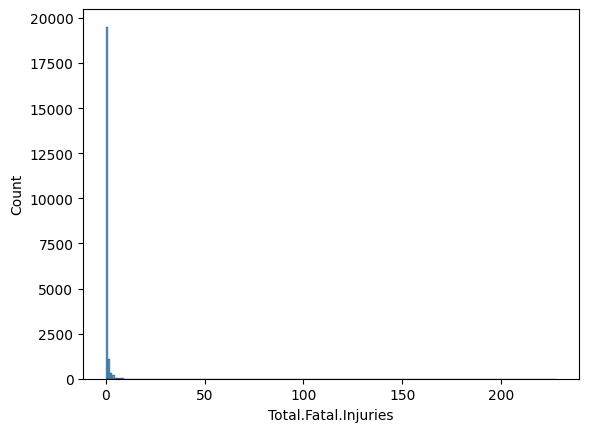

In [10]:
# Histogram to visualize the distribution
sns.histplot(x=df_USA_airplane['Total.Fatal.Injuries'], bins=200)

In [11]:
df_USA_airplane['Total.Serious.Injuries'].value_counts()
df_USA_airplane['Total.Serious.Injuries'].describe()

count    21288.000000
mean         0.278608
std          1.632464
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        137.000000
Name: Total.Serious.Injuries, dtype: float64

<Axes: xlabel='Total.Serious.Injuries', ylabel='Count'>

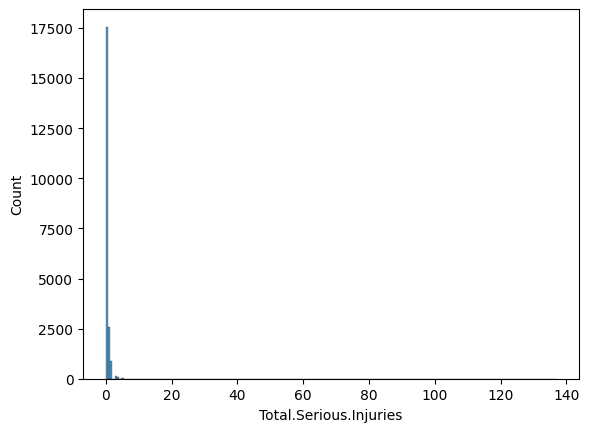

In [12]:
sns.histplot(x=df_USA_airplane['Total.Serious.Injuries'], bins=200)

In [13]:
df_USA_airplane['Total.Minor.Injuries'].value_counts()
df_USA_airplane['Total.Minor.Injuries'].describe()

count    21633.000000
mean         0.220496
std          0.822445
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         50.000000
Name: Total.Minor.Injuries, dtype: float64

<Axes: xlabel='Total.Minor.Injuries', ylabel='Count'>

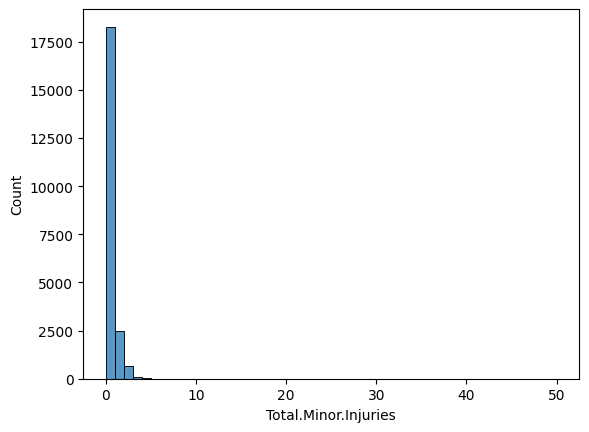

In [18]:
sns.histplot(x=df_USA_airplane['Total.Minor.Injuries'], bins=50)

Based on the value count function and brief histogram visualizations on these columns, we can see that  majority of their values are at **0**. Also, they are highly right skewed. Therefore, our strategy to handle the missing values from these columns is to impute with the median value of each column.

In [30]:
df_USA_airplane['Total.Fatal.Injuries'] = df_USA_airplane['Total.Fatal.Injuries'].fillna(df_USA_airplane['Total.Fatal.Injuries'].median())
df_USA_airplane['Total.Serious.Injuries'] = df_USA_airplane['Total.Serious.Injuries'].fillna(df_USA_airplane['Total.Serious.Injuries'].median())
df_USA_airplane['Total.Minor.Injuries'] = df_USA_airplane['Total.Minor.Injuries'].fillna(df_USA_airplane['Total.Minor.Injuries'].median())

df_USA_airplane['Total.Fatal.Injuries'].isna().sum()
df_USA_airplane['Total.Serious.Injuries'].isna().sum()
df_USA_airplane['Total.Minor.Injuries'].isna().sum()

/var/folders/g7/g9fxssr51yd508bw8xr5xtcw0000gn/T/ipykernel_6512/3669202890.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_USA_airplane['Total.Fatal.Injuries'] = df_USA_airplane['Total.Fatal.Injuries'].fillna(df_USA_airplane['Total.Fatal.Injuries'].median())
/var/folders/g7/g9fxssr51yd508bw8xr5xtcw0000gn/T/ipykernel_6512/3669202890.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_USA_airplane['Total.Serious.Injuries'] = df_USA_airplane['Total.Serious.Injuries'].fillna(df_USA_airplane['Total.Ser

0

#### Creating **Year** and **Month** columns

The **Event Date** column has the year, month, and day of the accident or incident. Here, we are creating two separte columns to extract the **Year** and **Month** of the **Event Date**, and changing the data type to the integar instead of string for future analyses.

In [15]:
df_USA_airplane['Event.Date'].sort_values(ascending=False)

df_USA_airplane['Year'] = df_USA_airplane['Event.Date'].str.split("-").str[0]
df_USA_airplane['Month'] = df_USA_airplane['Event.Date'].str.split("-").str[1]

/var/folders/g7/g9fxssr51yd508bw8xr5xtcw0000gn/T/ipykernel_6512/3395827739.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_USA_airplane['Year'] = df_USA_airplane['Event.Date'].str.split("-").str[0]
/var/folders/g7/g9fxssr51yd508bw8xr5xtcw0000gn/T/ipykernel_6512/3395827739.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_USA_airplane['Month'] = df_USA_airplane['Event.Date'].str.split("-").str[1]


In [16]:
df_USA_airplane['Year'] = df_USA_airplane['Year'].astype(int)
df_USA_airplane['Month'] = df_USA_airplane['Month'].astype(int)

/var/folders/g7/g9fxssr51yd508bw8xr5xtcw0000gn/T/ipykernel_6512/576085226.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_USA_airplane['Year'] = df_USA_airplane['Year'].astype(int)
/var/folders/g7/g9fxssr51yd508bw8xr5xtcw0000gn/T/ipykernel_6512/576085226.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_USA_airplane['Month'] = df_USA_airplane['Month'].astype(int)


In [88]:
# df_USA_airplane.to_csv("USA_Airplane_Clean.csv")

## Month with most accidents or incidents

Knowing the month with most accident or incident records can provide an important insight to companies operating aircrafts because the companies can ensure appropriate preperation can be done during the most accident and incident prone time of the year. This may include budgeting for more repairs or completing mendatory safety training for the staff members.

First, we visualize the number of records in the clean dataframe per month.

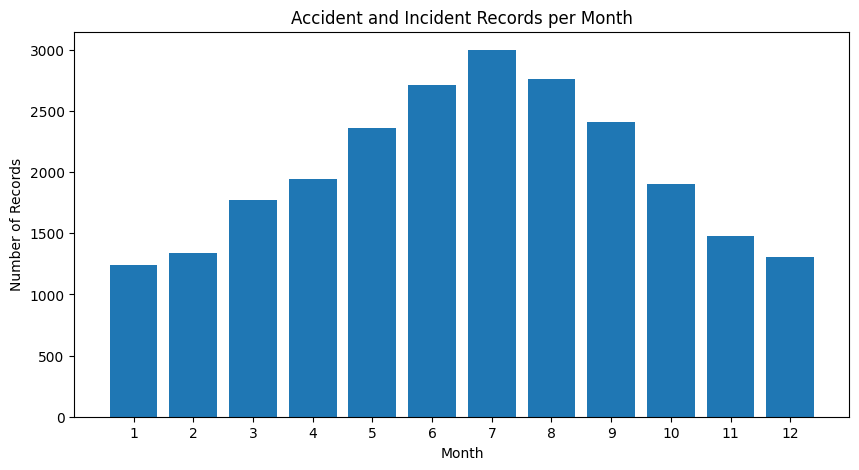

In [17]:
x = df_USA_airplane['Month'].value_counts().sort_index().index
y = df_USA_airplane['Month'].value_counts().sort_index().values

fig, ax = plt.subplots(figsize=(10,5))
ax.bar(x, y)
ax.set_title('Accident and Incident Records per Month')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Records')
ax.set_xticks(range(1,13))

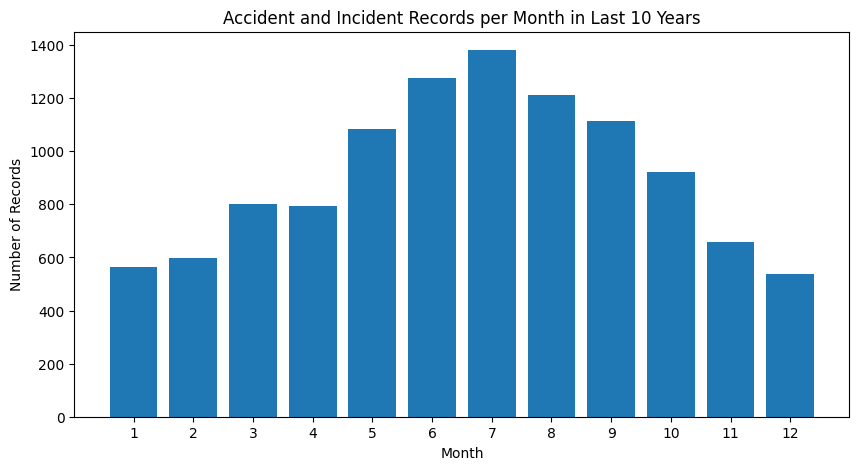

In [18]:
df_recent = df_USA_airplane.loc[df_USA_airplane['Year'] >= 2013]
x = df_recent['Month'].value_counts().sort_index().index
y = df_recent['Month'].value_counts().sort_index().values

fig, ax = plt.subplots(figsize=(10,5))
ax.bar(x, y)
ax.set_title('Accident and Incident Records per Month in Last 10 Years')
ax.set_xlabel('Month')
ax.set_ylabel('Number of Records')
ax.set_xticks(range(1,13))

In [19]:
risk_month = df_USA_airplane['Month'].mode()
risk_month_ten_years = df_recent['Month'].mode()

risk_month, risk_month_ten_years

(0    7
 Name: Month, dtype: int64,
 0    7
 Name: Month, dtype: int64)

Based on two bar graphs presented above, **July** appears to be the month with most accidents or incidents on airplane. Also, this trend seems to be true when we look at the data to its entirety, or only the most recent 10 years. This is further validated by calculating the mode of both time periods.

Since July is the month with the most reported accident or incidents, therefore heightened risk, we suggest that implementing preventative measures such as completing additional safety training of the staff members or budgeting more cost for aircraft repair for the month can be beneficial.

## Number of Damaged Airplanes per Year

Following accidents or incidents, the aircrafts will most likely experience different degrees of damange. Having appropriate strategies to repair aircrafts in different severities of damange can help the company become more financially efficient. For the purpose of this analysis, we only focus on the most recent 10 years.

First step is to group the dataframe accordingly. We decide to group by the **Aircraft Damage** column, which is a categorical measure. Then, we sort by the **Year** column can calculate the total counts of records.

In [20]:
# Grouping the dataframe
grouped_aircraft_damage = df_recent.groupby(['Aircraft.damage'])
grouped_aircraft_damage['Year'].value_counts()

Aircraft.damage  Year
Destroyed        2019     151
                 2015     132
                 2018     129
                 2016     127
                 2017     124
                 2013     117
                 2020     115
                 2014     114
                 2021     110
                 2022      91
Minor            2015      25
                 2014      25
                 2013      25
                 2017      15
                 2019      15
                 2016      14
                 2022      13
                 2021      13
                 2018       8
                 2020       6
Substantial      2016    1005
                 2018     990
                 2017     976
                 2014     951
                 2013     948
                 2015     940
                 2019     931
                 2022     883
                 2020     861
                 2021     836
Unknown          2021      40
                 2022      38
                 2

In [83]:
# Value counts of each category in the Aircraft.damage column
grouped_aircraft_damage.get_group('Destroyed')['Year'].value_counts()
grouped_aircraft_damage.get_group('Substantial')['Year'].value_counts()
grouped_aircraft_damage.get_group('Minor')['Year'].value_counts()
grouped_aircraft_damage.get_group('Unknown')['Year'].value_counts()

Year
2021    40
2022    38
2017    29
2016    27
2015    25
2014    23
2018    23
2019    21
2013    19
2020    11
Name: count, dtype: int64

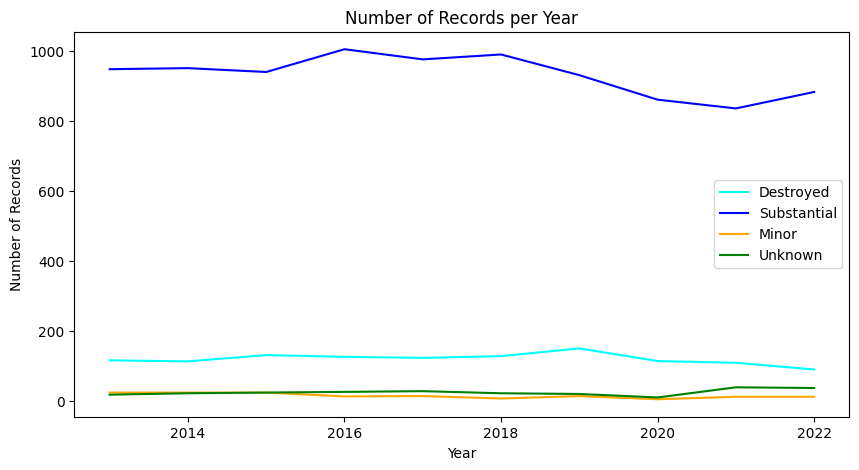

In [21]:
# Visualizing via line graph
fig, ax = plt.subplots(figsize=(10,5))
x_des = grouped_aircraft_damage.get_group('Destroyed')['Year'].value_counts().sort_index().index
y_des = grouped_aircraft_damage.get_group('Destroyed')['Year'].value_counts().sort_index().values
ax.plot(x_des,y_des, 'cyan', label='Destroyed')

x_sub = grouped_aircraft_damage.get_group('Substantial')['Year'].value_counts().sort_index().index
y_sub = grouped_aircraft_damage.get_group('Substantial')['Year'].value_counts().sort_index().values
ax.plot(x_sub,y_sub, 'b', label='Substantial')

x_minor = grouped_aircraft_damage.get_group('Minor')['Year'].value_counts().sort_index().index
y_minor = grouped_aircraft_damage.get_group('Minor')['Year'].value_counts().sort_index().values
ax.plot(x_minor,y_minor, 'orange', label='Minor')

x_unknown = grouped_aircraft_damage.get_group('Unknown')['Year'].value_counts().sort_index().index
y_unknown = grouped_aircraft_damage.get_group('Unknown')['Year'].value_counts().sort_index().values
ax.plot(x_unknown,y_unknown, 'g', label='Unknown')

ax.set_title("Number of Records per Year")
ax.set_xlabel("Year")
ax.set_ylabel("Number of Records")
ax.legend()

As demonstrated in the value counts and the line graphs, significantly higher number of accidents or incidents have led to substantial damage in the airplane during last 10 years. Therefore, we suggest that when planning or future repairs of the airplanes, the company should expect a significant amount of cases to entail substantial repairment needed every year. This may involve assigning appropriate personel to repair, ensuring the materials needed for the repair are sufficient for repairng substantial damanges, or budgeting for substantial repairs.

## Number of Injuries per Top 5 Makes of Airplanes

In [23]:
# Changing the "Make" values to title case
df_recent['Make'] = df_recent['Make'].str.lower()
# top_5_makes = df_recent['Make'].value_counts().index[:5]
df_recent['Make'].value_counts().index

/var/folders/g7/g9fxssr51yd508bw8xr5xtcw0000gn/T/ipykernel_6512/450139792.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recent['Make'] = df_recent['Make'].str.lower()


Index(['cessna', 'piper', 'beech', 'boeing', 'mooney', 'air tractor inc',
       'cirrus design corp', 'bellanca', 'aeronca', 'vans',
       ...
       'sukhoi', 'jones ralph d', 'pierce, henry', 'brunzlick larry r',
       'lerch', 'graves bryon s', 'clark', 'boatright waylon', 'j. schilling',
       'arado-flugzeugwerke gmbh'],
      dtype='object', name='Make', length=1762)

In [116]:
# Grouping on the top 5 makes
grouped_make = df_recent.loc[df_recent['Make'].isin(top_5_makes)].groupby('Make')

Total.Serious.Injuries
0.0    2673
1.0     340
2.0     161
3.0      26
4.0      16
5.0       3
6.0       2
7.0       1
9.0       1
Name: count, dtype: int64